# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

In [3]:
file_db = "~/Downloads/chinook.sqlite"
model_name = 'llama3.2'

clean_and_train = True  # False  

In [4]:
config = {
    'model': model_name,   # 'mistral' # "starcoder2"
}
vn = MyVanna(config=config)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: papa-game


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

In [9]:
def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

In [10]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [11]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [12]:
df_ddl

,type,sql
0,table,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [13]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")


Adding ddl: CREATE TABLE Album
(
    AlbumId INTEGER  NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),
    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE Artist
(
    ArtistId INTEGER  NOT NULL,
    Name NVARCHAR(120),
    CONSTRAINT PK_Artist PRIMARY KEY  (ArtistId)
)
Adding ddl: CREATE TABLE Customer
(
    CustomerId INTEGER  NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),
    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl:

In [14]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,00e3136b-f688-5ae4-a2bb-3354635261fc-ddl,None,CREATE INDEX IFK_CustomerSupportRepId ON Custo...,ddl
1,04a3d9eb-fab7-5641-96a1-ae7924ae05e5-ddl,None,CREATE INDEX IFK_EmployeeReportsTo ON Employee...,ddl
2,11439f95-bfbc-530c-8b7f-91f9e45d2877-ddl,None,CREATE TABLE Track\n(\n TrackId INTEGER NO...,ddl
3,29f57d6d-552a-5cc2-8c8c-cb78918d1646-ddl,None,CREATE TABLE Genre\n(\n GenreId INTEGER NO...,ddl
4,33d9efb0-969c-59b8-95f1-04b3e0ddd2df-ddl,None,CREATE INDEX IFK_TrackAlbumId ON Track (AlbumId),ddl
5,37bc3b25-2dc1-5160-bcae-baf85b93f023-ddl,None,CREATE TABLE InvoiceLine\n(\n InvoiceLineId...,ddl
6,4893f9e4-2275-53cb-89da-43de3063acf1-ddl,None,CREATE TABLE PlaylistTrack\n(\n PlaylistId ...,ddl
7,82dfbbaf-4fe6-5213-8c5a-2e765f459ca1-ddl,None,CREATE TABLE Artist\n(\n ArtistId INTEGER ...,ddl
8,8a3cbf5f-a4d9-5429-93de-e49ef72c5bd5-ddl,None,CREATE TABLE Customer\n(\n CustomerId INTEG...,ddl
9,93344862-5b4e-5a02-8c70-982b08c6badf-ddl,None,CREATE INDEX IFK_InvoiceLineInvoiceId ON Invoi...,ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [15]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Playlist\n(\n    PlaylistId INTEGER  NOT NULL,\n    Name NVARCHAR(120),\n    CONSTRAINT PK_Playlist PRIMARY KEY  (PlaylistId)\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaTyp

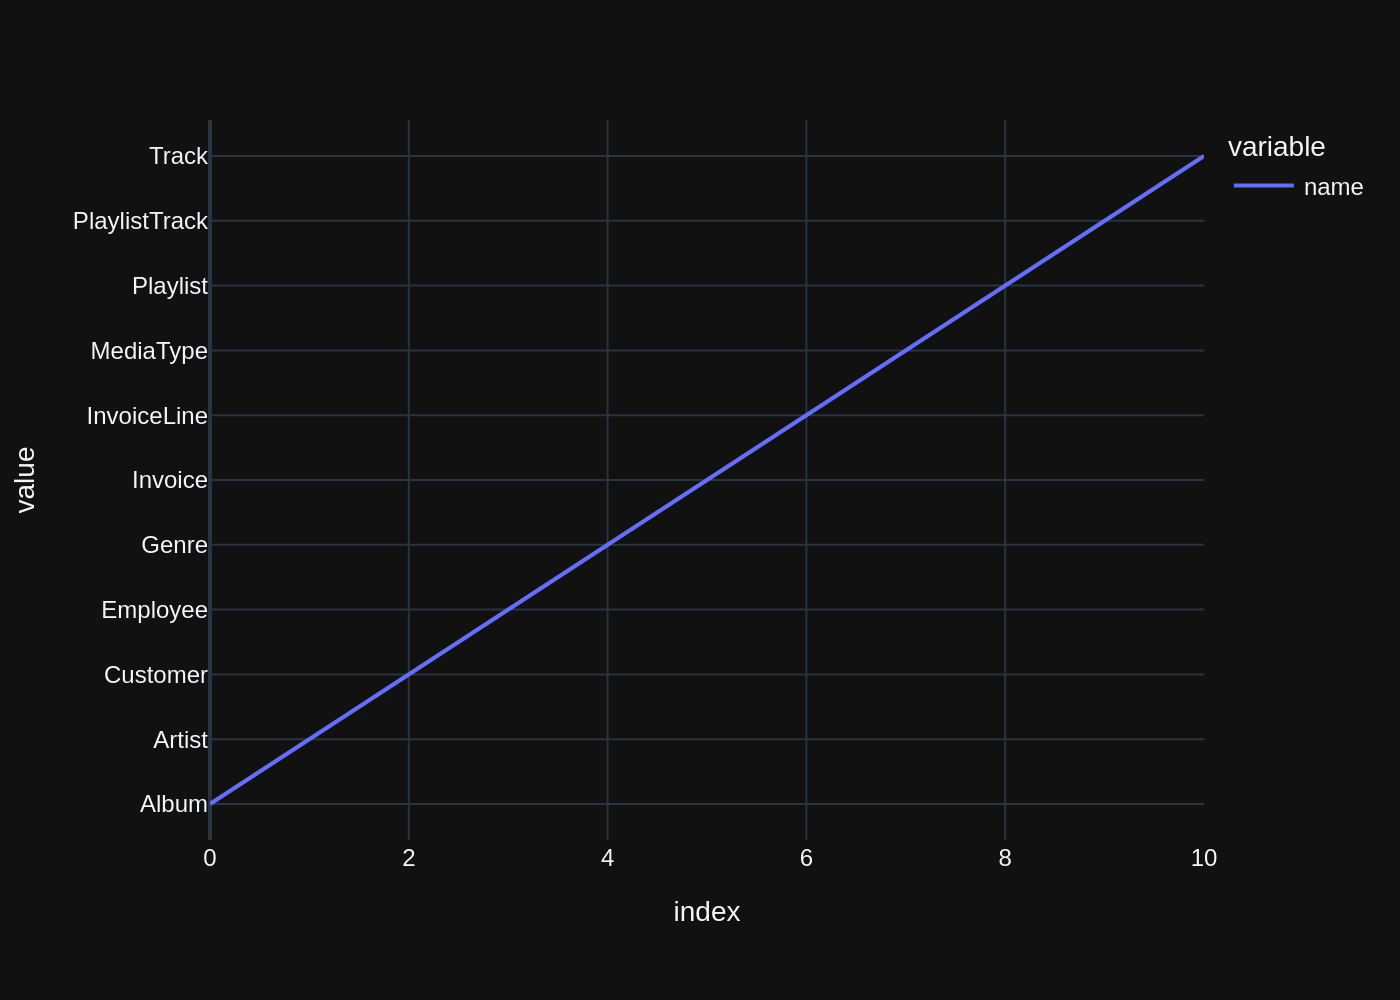

("SELECT name\nFROM sqlite_master\nWHERE type='table'",
              name
 0           Album
 1          Artist
 2        Customer
 3        Employee
 4           Genre
 5         Invoice
 6     InvoiceLine
 7       MediaType
 8        Playlist
 9   PlaylistTrack
 10          Track,
 Figure({
     'data': [{'hovertemplate': 'variable=name<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'name',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'name',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
               'xaxis': 'x',
               'y': array(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice',
                           'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track'],
             

In [16]:
vn.ask(question="Can you list all tables in the SQLite database catalog?")

In [17]:
vn.ask(question="which table stores customer's orders")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON Customer (SupportRepId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n

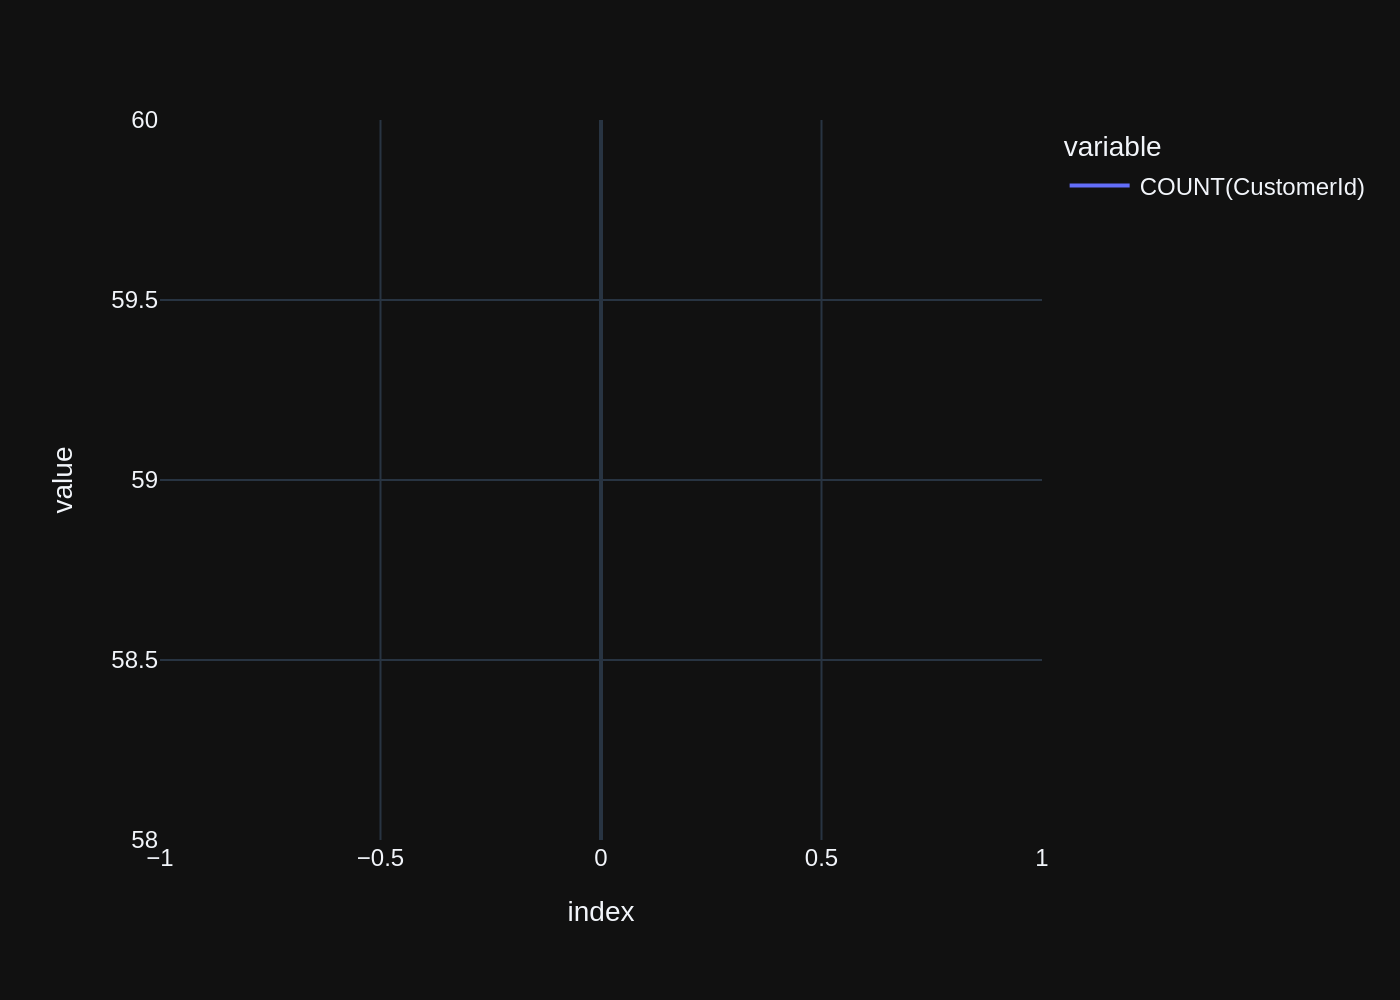

('SELECT COUNT(CustomerId) FROM Customer',
    COUNT(CustomerId)
 0                 59,
 Figure({
     'data': [{'hovertemplate': 'variable=COUNT(CustomerId)<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'COUNT(CustomerId)',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'COUNT(CustomerId)',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([59]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}

In [18]:
vn.ask(question="How many customers are there")

In [19]:
vn.ask(question="what are the top 5 countries that customers come from?")

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

### More SQL questions

see `sample-sql-queries-sqlite-chinook.ipynb`

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON Album (ArtistId)\n\nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160)  NOT NULL,\n    ArtistId INTEGER  NOT NULL,\n    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),\n    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON

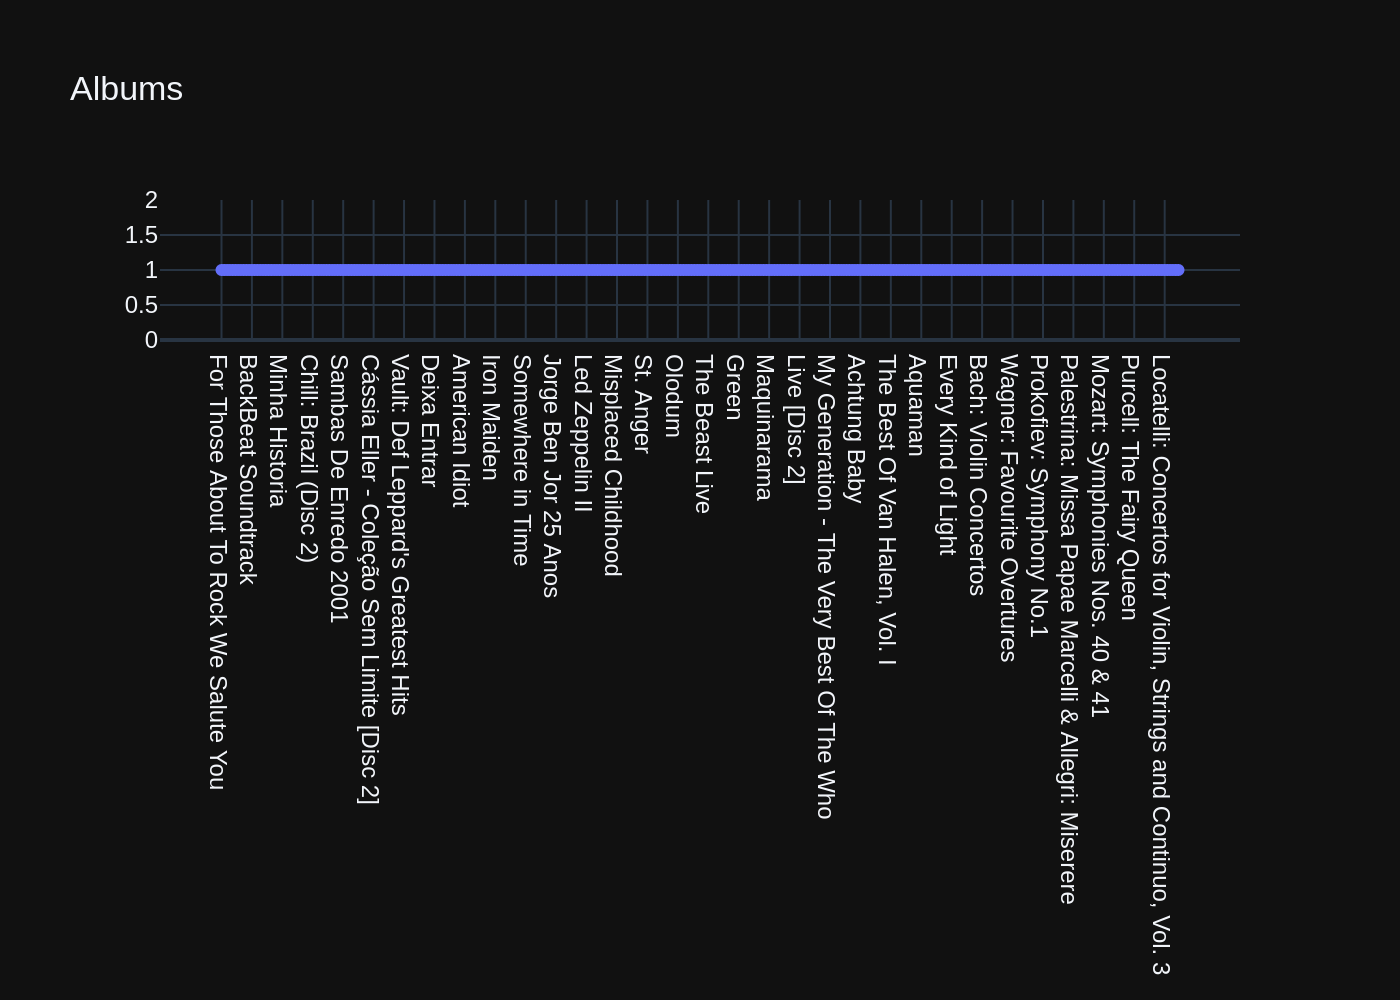

('SELECT T1.Title, T2.Name AS ArtistName \nFROM Album AS T1 \nJOIN Artist AS T2 ON T1.ArtistId = T2.ArtistId',
                                                  Title  \
 0                For Those About To Rock We Salute You   
 1                                    Balls to the Wall   
 2                                    Restless and Wild   
 3                                    Let There Be Rock   
 4                                             Big Ones   
 ..                                                 ...   
 342                             Respighi:Pines of Rome   
 343  Schubert: The Late String Quartets & String Qu...   
 344                                Monteverdi: L'Orfeo   
 345                              Mozart: Chamber Music   
 346  Koyaanisqatsi (Soundtrack from the Motion Pict...   
 
                                             ArtistName  
 0                                                AC/DC  
 1                                               Accept  
 2   

In [20]:
question = """  
    List all albums and their corresponding artist names  
"""

vn.ask(question=question)

In [21]:
question = """  
    Find all tracks with a name containing "What" (case-insensitive)
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackAlb

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

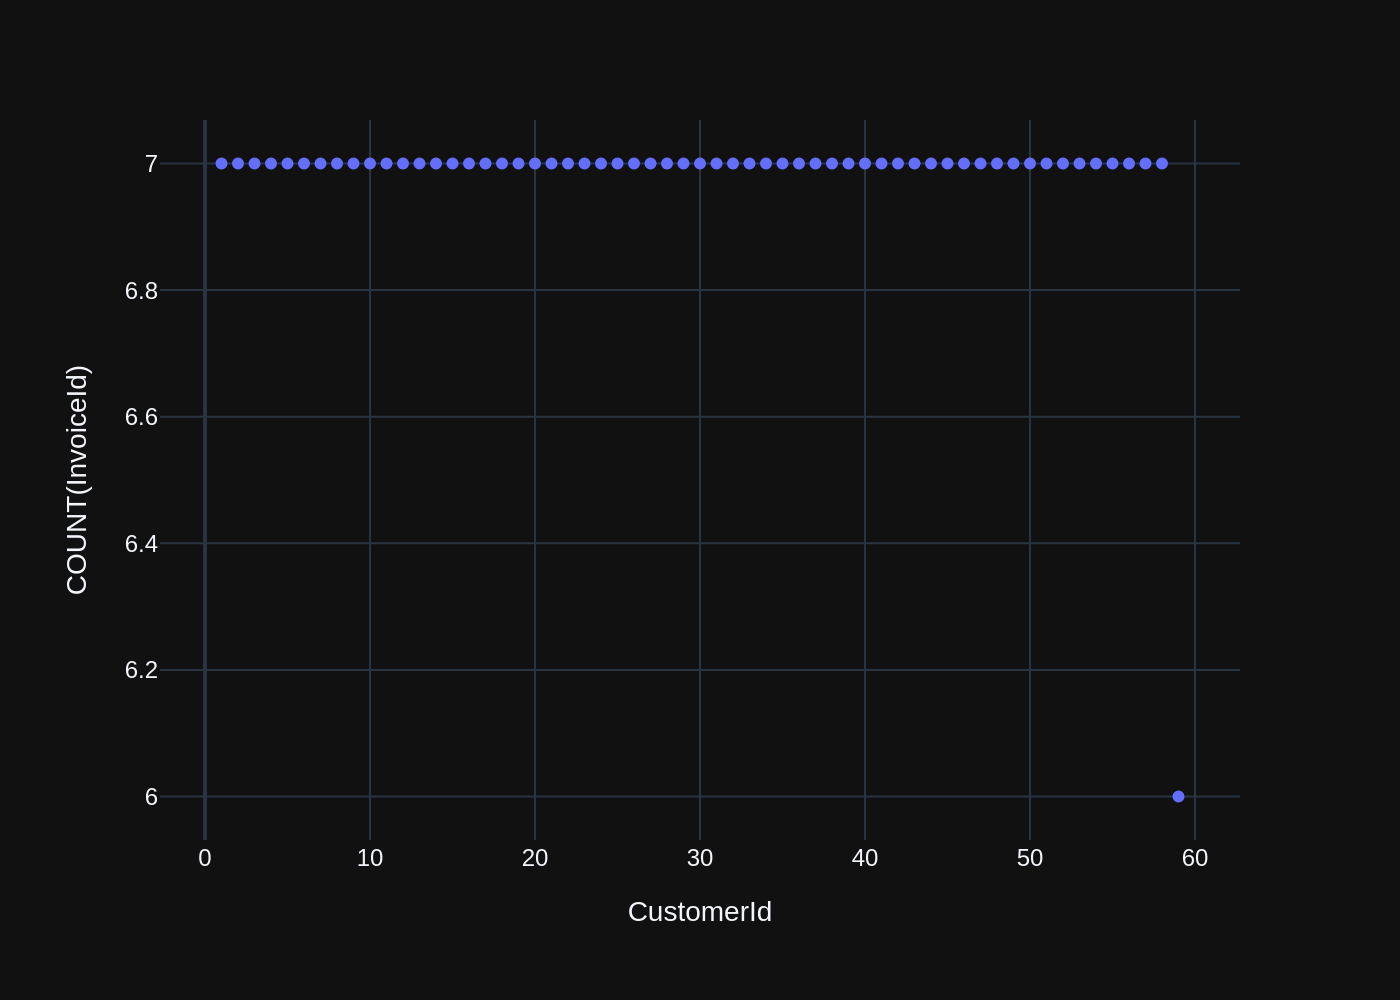

('SELECT CustomerId, COUNT(InvoiceId) \nFROM Invoice \nGROUP BY CustomerId',
     CustomerId  COUNT(InvoiceId)
 0            1                 7
 1            2                 7
 2            3                 7
 3            4                 7
 4            5                 7
 5            6                 7
 6            7                 7
 7            8                 7
 8            9                 7
 9           10                 7
 10          11                 7
 11          12                 7
 12          13                 7
 13          14                 7
 14          15                 7
 15          16                 7
 16          17                 7
 17          18                 7
 18          19                 7
 19          20                 7
 20          21                 7
 21          22                 7
 22          23                 7
 23          24                 7
 24          25                 7
 25          26                 7
 26  

In [22]:
question = """  
    Get the total number of invoices for each customer
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

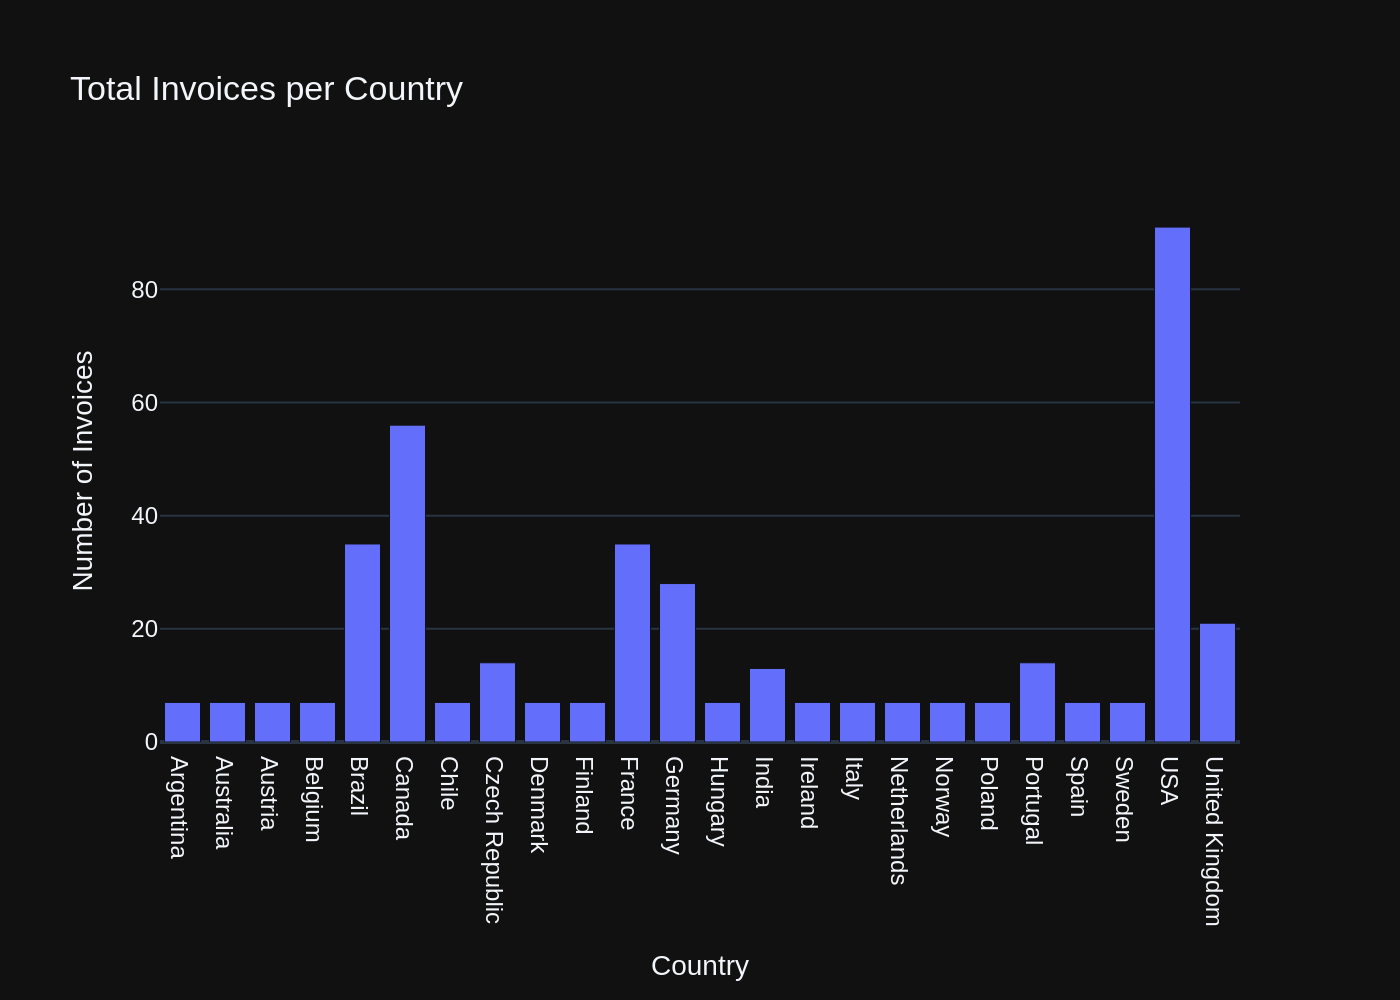

('SELECT BillingCountry, COUNT(InvoiceId) \nFROM Invoice \nGROUP BY BillingCountry',
     BillingCountry  COUNT(InvoiceId)
 0        Argentina                 7
 1        Australia                 7
 2          Austria                 7
 3          Belgium                 7
 4           Brazil                35
 5           Canada                56
 6            Chile                 7
 7   Czech Republic                14
 8          Denmark                 7
 9          Finland                 7
 10          France                35
 11         Germany                28
 12         Hungary                 7
 13           India                13
 14         Ireland                 7
 15           Italy                 7
 16     Netherlands                 7
 17          Norway                 7
 18          Poland                 7
 19        Portugal                14
 20           Spain                 7
 21          Sweden                 7
 22             USA                91
 23

In [23]:
question = """  
    Find the total number of invoices per country:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRIMARY KEY  (InvoiceLineId),\n    FOREIGN KEY (InvoiceId) REFERENCES Invoice (InvoiceId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (TrackId) REFERENCES Track (TrackId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),

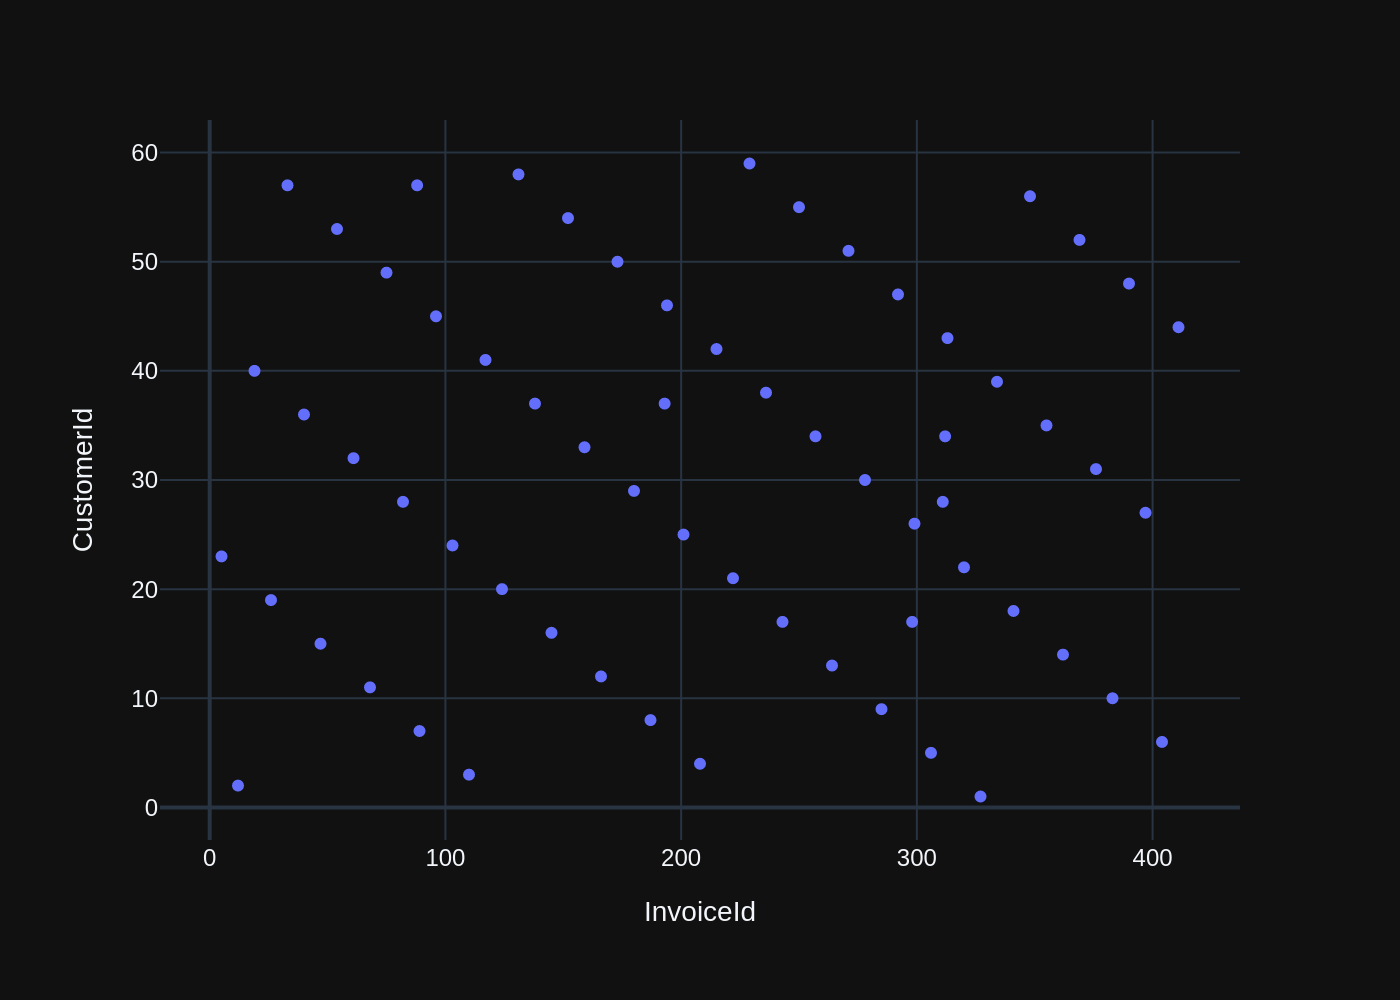

('SELECT * \nFROM Invoice \nWHERE Total > 10',
     InvoiceId  CustomerId          InvoiceDate             BillingAddress  \
 0           5          23  2009-01-11 00:00:00            69 Salem Street   
 1          12           2  2009-02-11 00:00:00    Theodor-Heuss-Straße 34   
 2          19          40  2009-03-14 00:00:00             8, Rue Hanovre   
 3          26          19  2009-04-14 00:00:00            1 Infinite Loop   
 4          33          57  2009-05-15 00:00:00            Calle Lira, 198   
 ..        ...         ...                  ...                        ...   
 59        383          10  2013-08-12 00:00:00  Rua Dr. Falcão Filho, 155   
 60        390          48  2013-09-12 00:00:00      Lijnbaansgracht 120bg   
 61        397          27  2013-10-13 00:00:00            1033 N Park Ave   
 62        404           6  2013-11-13 00:00:00              Rilská 3174/6   
 63        411          44  2013-12-14 00:00:00            Porthaninkatu 9   
 
    BillingCity

In [24]:
question = """  
    List all invoices with a total exceeding $10:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRI

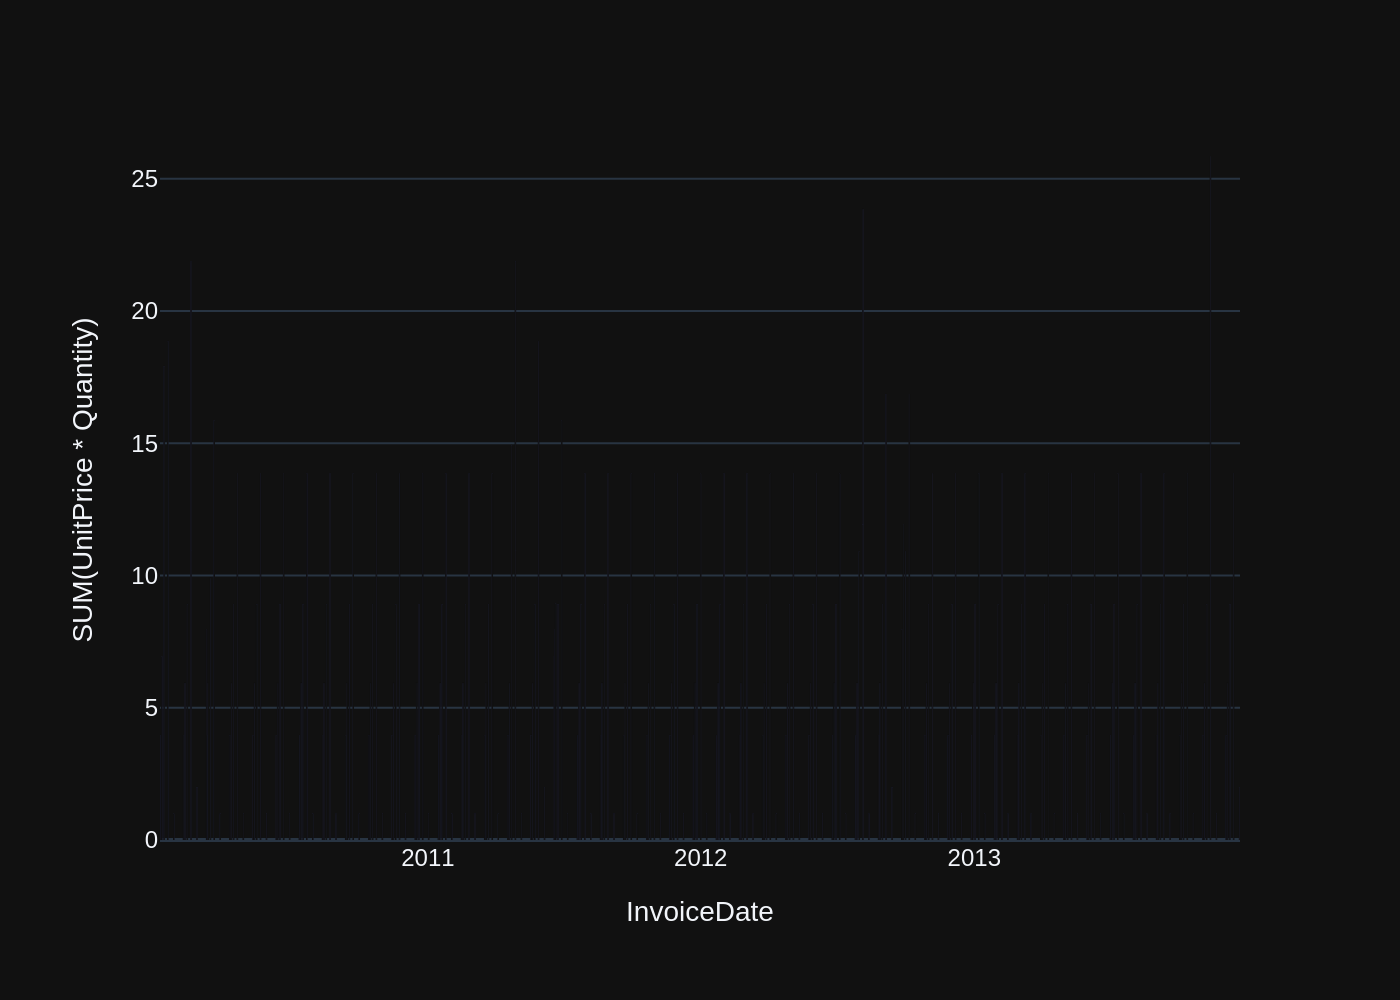

("SELECT InvoiceDate, SUM(UnitPrice * Quantity) \nFROM InvoiceLine \nJOIN Invoice ON InvoiceLine.InvoiceId = Invoice.InvoiceId \nWHERE InvoiceDate > '2010-01-01' \nGROUP BY InvoiceDate",
              InvoiceDate  SUM(UnitPrice * Quantity)
 0    2010-01-08 00:00:00                       3.96
 1    2010-01-09 00:00:00                       3.96
 2    2010-01-10 00:00:00                       6.94
 3    2010-01-13 00:00:00                      17.91
 4    2010-01-18 00:00:00                      18.86
 ..                   ...                        ...
 277  2013-12-05 00:00:00                       3.96
 278  2013-12-06 00:00:00                       5.94
 279  2013-12-09 00:00:00                       8.91
 280  2013-12-14 00:00:00                      13.86
 281  2013-12-22 00:00:00                       1.99
 
 [282 rows x 2 columns],
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'InvoiceDate=%{x}<br>SUM(UnitPrice * Quantity)=%{y}<extra></extra>'

In [25]:
question = """  
    Find all invoices since 2010 and the total amount invoiced:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON Employee (ReportsTo)\n\nCREATE TABLE Employee\n(\n    EmployeeId INTEGER  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    FirstName NVARCHAR(20)  NOT NULL,\n    Title NVARCHAR(30),\n    ReportsTo INTEGER,\n    BirthDate DATETIME,\n    HireDate DATETIME,\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60),\n    CONSTRAINT PK_Employee PRIMARY KEY  (EmployeeId),\n    FOREIGN KEY (ReportsTo) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    Firs

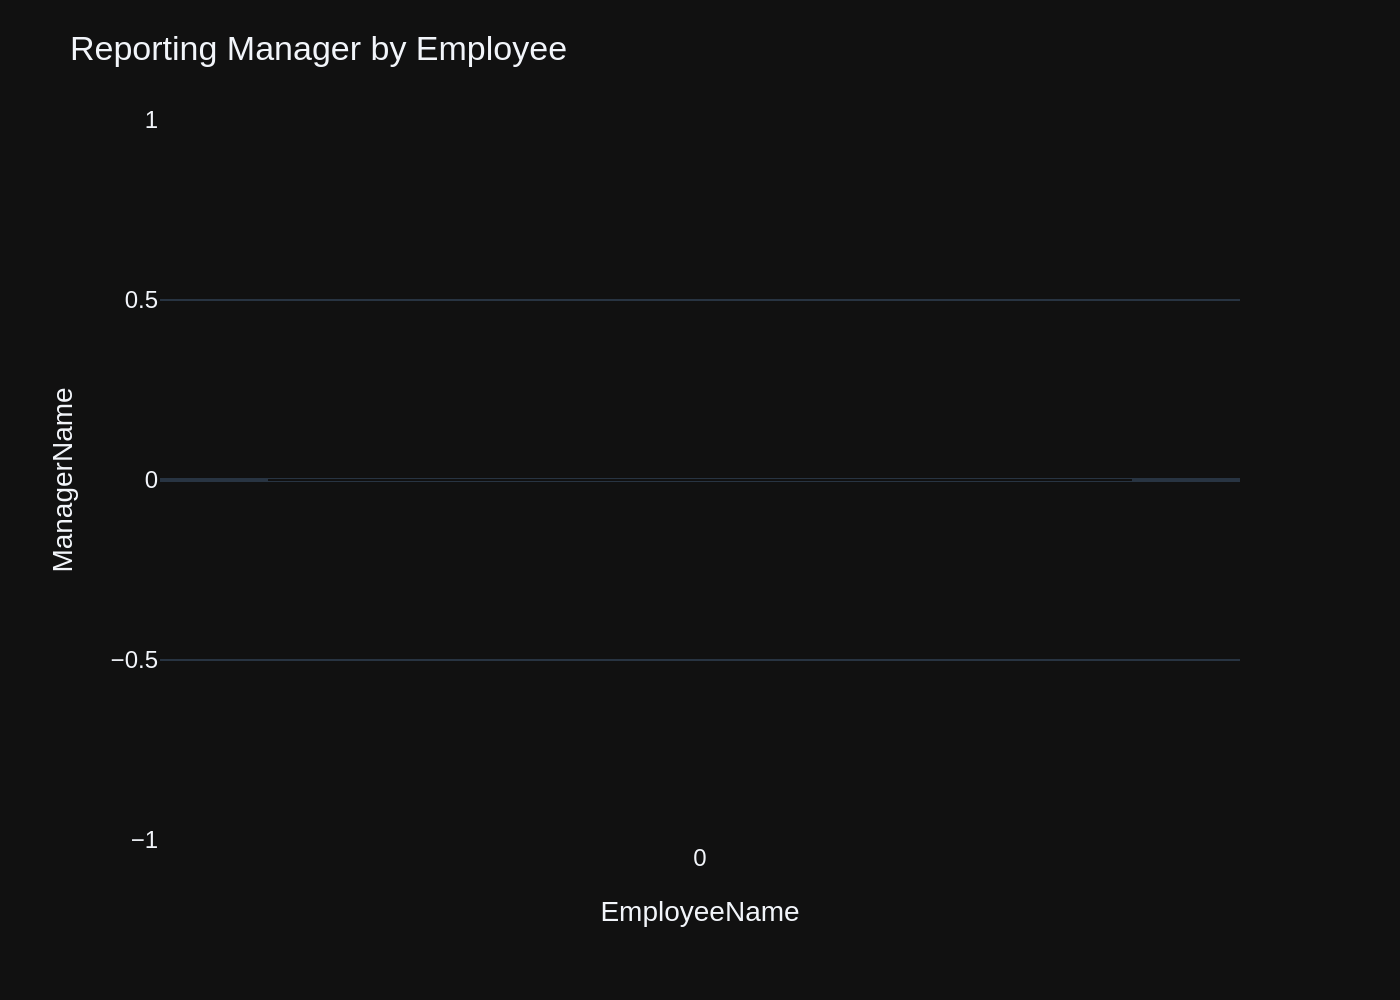

("SELECT E.EmployeeId, E.FirstName + ' ' + E.LastName AS EmployeeName, M.FirstName + ' ' + M.LastName AS ManagerName \nFROM Employee AS E \nLEFT JOIN Employee AS M ON E.ReportsTo = M.EmployeeId",
    EmployeeId  EmployeeName  ManagerName
 0           1             0          NaN
 1           2             0          0.0
 2           3             0          0.0
 3           4             0          0.0
 4           5             0          0.0
 5           6             0          0.0
 6           7             0          0.0
 7           8             0          0.0,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'EmployeeName=%{x}<br>ManagerName=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
        

In [26]:
question = """  
    List all employees and their reporting manager's name (if any):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

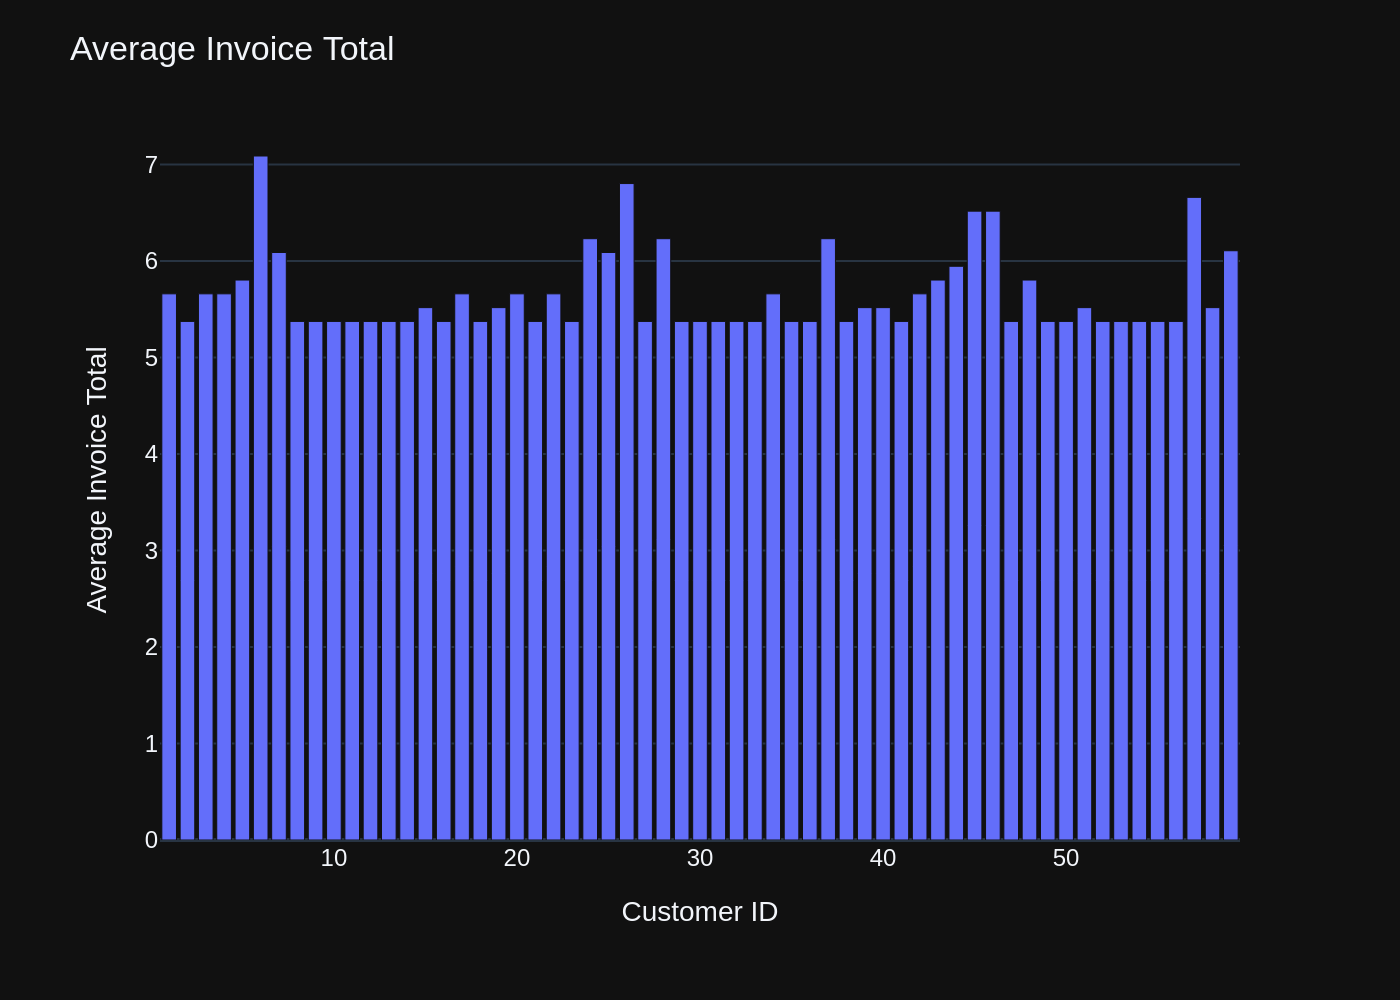

('SELECT CustomerId, AVG(Total) AS AverageTotal \nFROM Invoice \nGROUP BY CustomerId',
     CustomerId  AverageTotal
 0            1      5.660000
 1            2      5.374286
 2            3      5.660000
 3            4      5.660000
 4            5      5.802857
 5            6      7.088571
 6            7      6.088571
 7            8      5.374286
 8            9      5.374286
 9           10      5.374286
 10          11      5.374286
 11          12      5.374286
 12          13      5.374286
 13          14      5.374286
 14          15      5.517143
 15          16      5.374286
 16          17      5.660000
 17          18      5.374286
 18          19      5.517143
 19          20      5.660000
 20          21      5.374286
 21          22      5.660000
 22          23      5.374286
 23          24      6.231429
 24          25      6.088571
 25          26      6.802857
 26          27      5.374286
 27          28      6.231429
 28          29      5.374286
 29          

In [27]:
question = """  
    Get the average invoice total for each customer:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackAlbumId ON Track (AlbumId)\n\nCREATE INDEX IFK_TrackGen

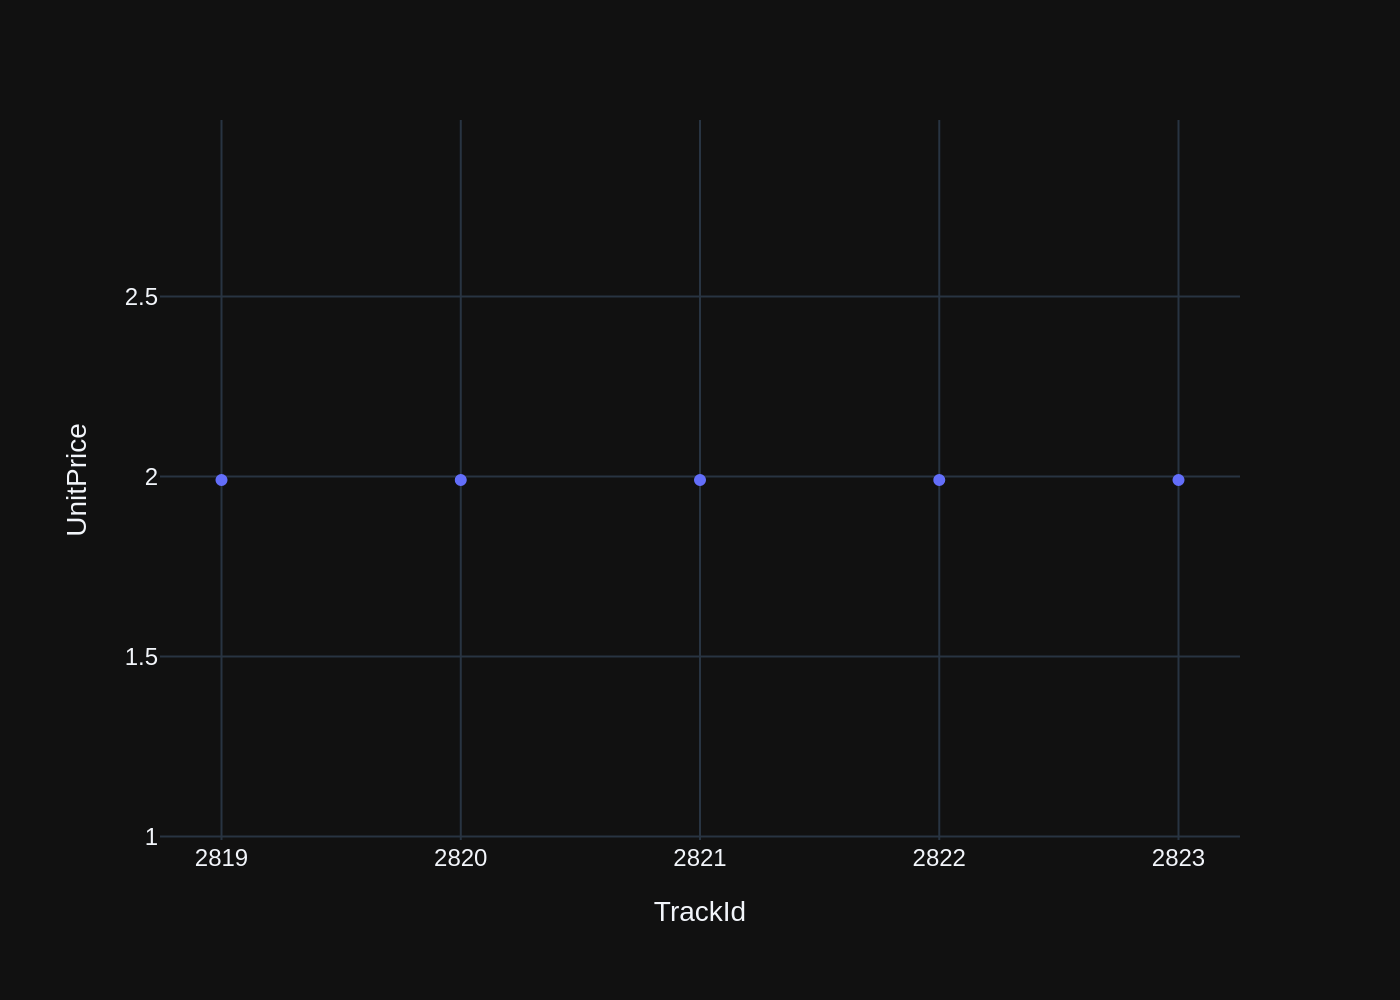

('SELECT TrackId, Name, UnitPrice \nFROM Track \nORDER BY UnitPrice DESC \nLIMIT 5',
    TrackId                                    Name  UnitPrice
 0     2819  Battlestar Galactica: The Story So Far       1.99
 1     2820                  Occupation / Precipice       1.99
 2     2821                           Exodus, Pt. 1       1.99
 3     2822                           Exodus, Pt. 2       1.99
 4     2823                           Collaborators       1.99,
 Figure({
     'data': [{'hovertemplate': 'TrackId=%{x}<br>UnitPrice=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([2819, 2820, 2821, 2822, 2823]),
               'xaxis': 'x',
               'y': array([1.99, 1.99, 1.99, 1.99, 1.99]),
               'yaxis': 'y'}],


In [28]:
question = """  
    Find the top 5 most expensive tracks (based on unit price):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Genre\n(\n  

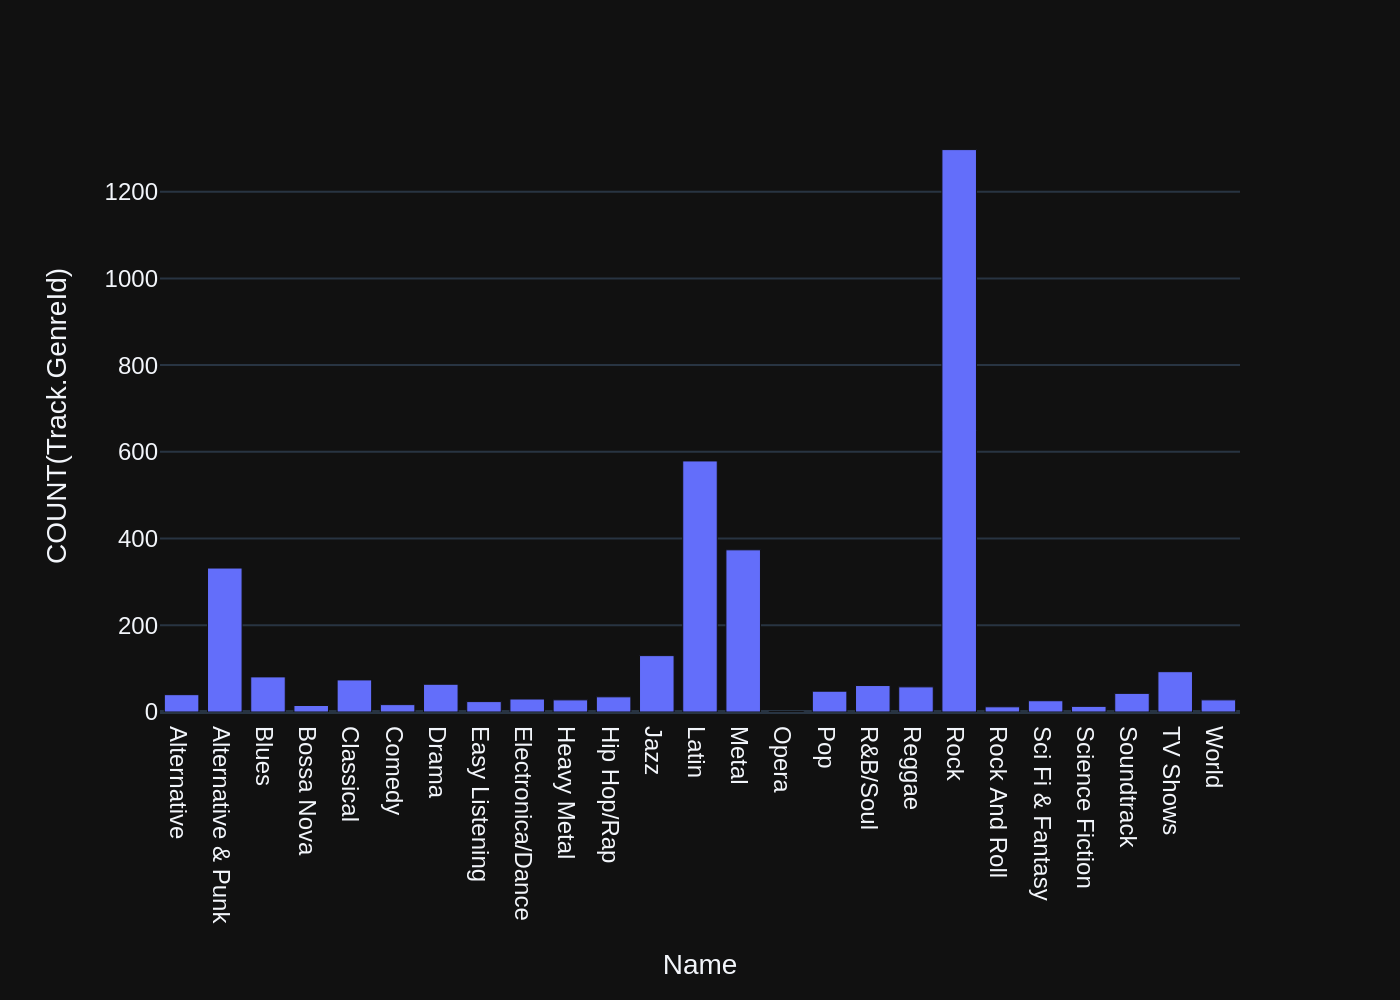

('SELECT Genre.Name, COUNT(Track.GenreId) \nFROM Track \nJOIN Genre ON Track.GenreId = Genre.GenreId \nGROUP BY Genre.Name',
                   Name  COUNT(Track.GenreId)
 0          Alternative                    40
 1   Alternative & Punk                   332
 2                Blues                    81
 3           Bossa Nova                    15
 4            Classical                    74
 5               Comedy                    17
 6                Drama                    64
 7       Easy Listening                    24
 8    Electronica/Dance                    30
 9          Heavy Metal                    28
 10         Hip Hop/Rap                    35
 11                Jazz                   130
 12               Latin                   579
 13               Metal                   374
 14               Opera                     1
 15                 Pop                    48
 16            R&B/Soul                    61
 17              Reggae                    58
 

In [29]:
question = """  
    List all genres and the number of tracks in each genre:
"""

vn.ask(question=question)

In [30]:
question = """  
    Get all genres that do not have any tracks associated with them:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_Playlist

In [31]:
question = """  
    List all customers who have not placed any orders:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

In [32]:
question = """ 
    There are 3 tables: artists, albums and tracks, where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    Can you find the top 10 most popular artists based on the number of tracks
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160)  NOT NULL,\n    ArtistId INTEGER  NOT NULL,\n    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),\n    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KE

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON Customer (SupportRepId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n

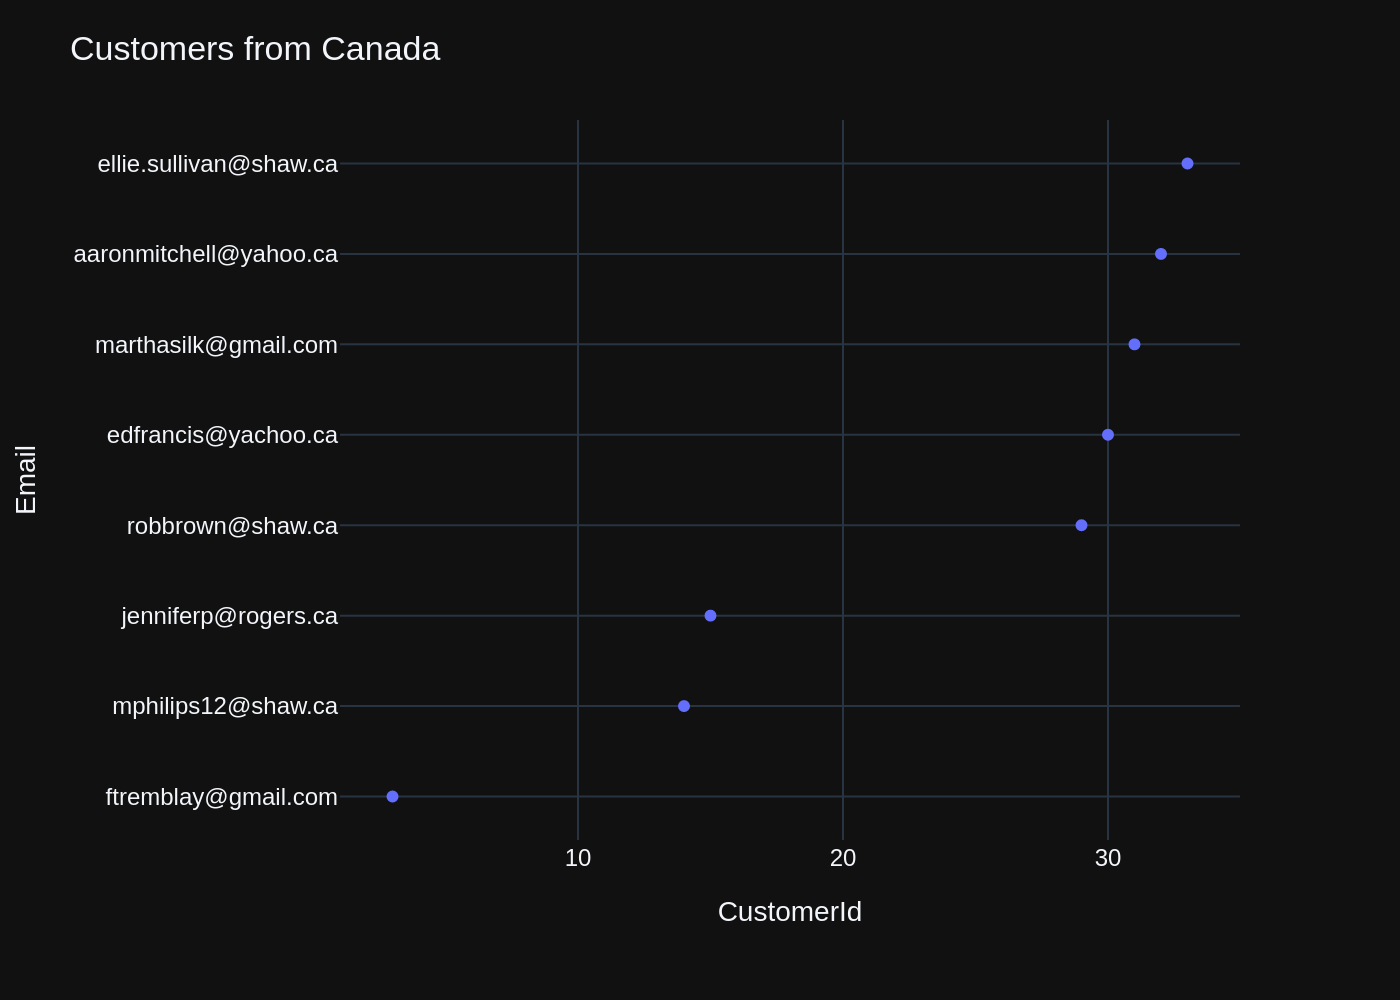

("SELECT CustomerId, Email \nFROM Customer \nWHERE Country = 'Canada'",
    CustomerId                   Email
 0           3     ftremblay@gmail.com
 1          14      mphilips12@shaw.ca
 2          15     jenniferp@rogers.ca
 3          29        robbrown@shaw.ca
 4          30     edfrancis@yachoo.ca
 5          31    marthasilk@gmail.com
 6          32  aaronmitchell@yahoo.ca
 7          33  ellie.sullivan@shaw.ca,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>Email=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'h',
               'showlegend': False,
               'type': 'scatter',
               'x': array([ 3, 14, 15, 29, 30, 31, 32, 33]),
               'xaxis': 'x',
               'y': array(['ftremblay@gmail.com', 'mphilips12@shaw.ca', 'jenniferp@rogers.ca',
                           'robbro

In [33]:
question = """  
     List all customers from Canada and their email addresses:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

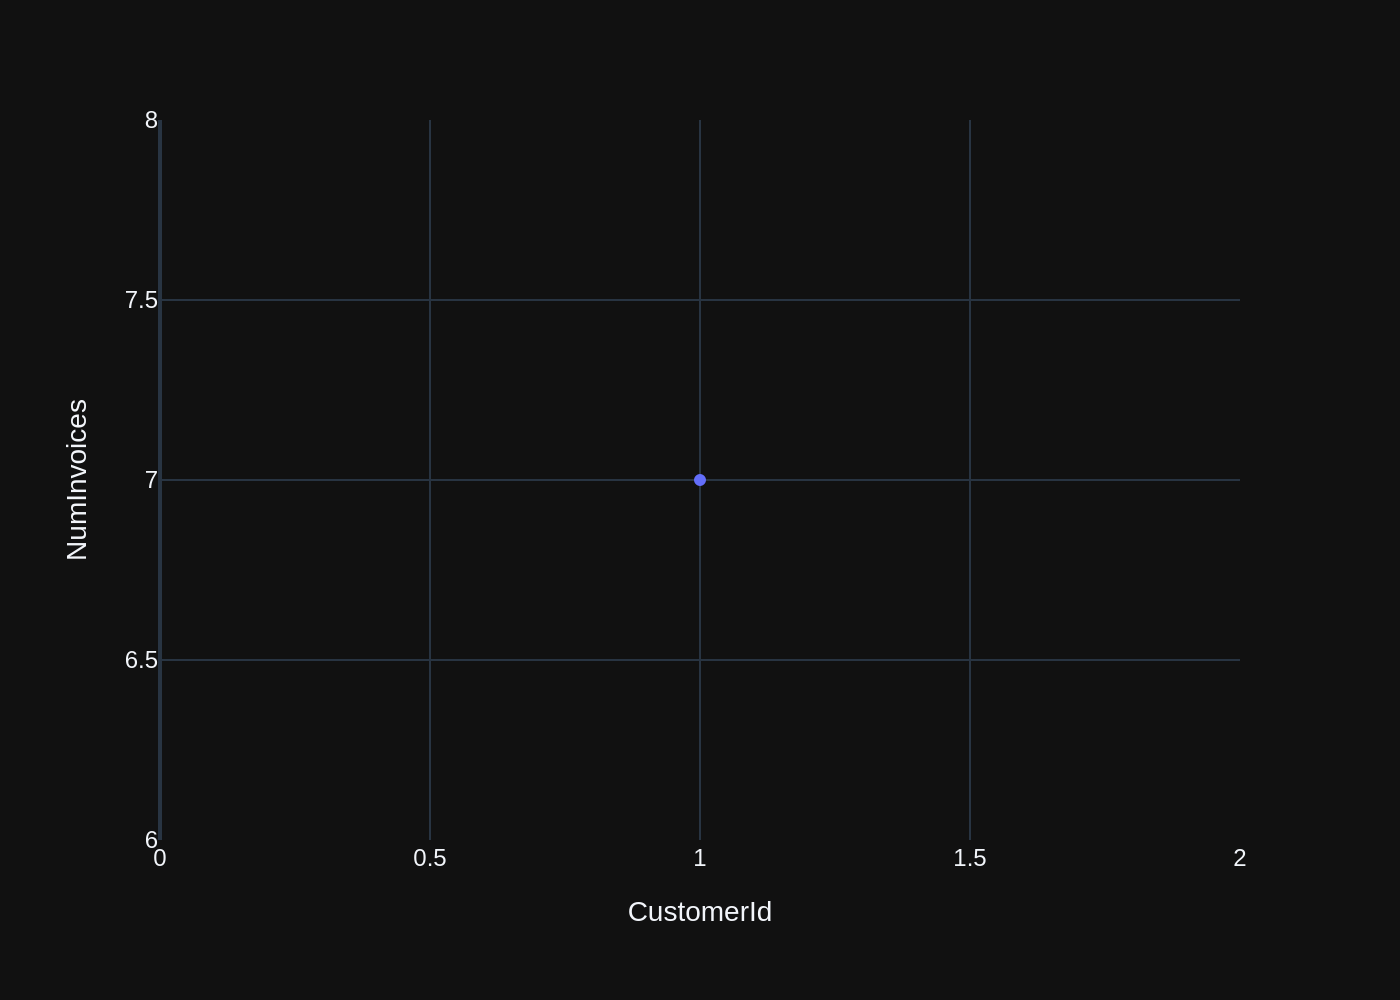

('SELECT CustomerId, COUNT(InvoiceId) AS NumInvoices \nFROM Invoice \nGROUP BY CustomerId \nORDER BY NumInvoices DESC LIMIT 1',
    CustomerId  NumInvoices
 0           1            7,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>NumInvoices=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1]),
               'xaxis': 'x',
               'y': array([7]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'CustomerId'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'NumInvoices'}}}
 }))

In [34]:
question = """  
     Find the customer with the most invoices 
"""

vn.ask(question=question)

### Advanced SQL questions

In [35]:
question = """  
     Find the customer who bought the most albums in total quantity (across all invoices): 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160

In [36]:
question = """  
    Hint: album quantity is found in invoice_items, 
    
    Find the top 5 customers who bought the most albums in total quantity (across all invoices):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160)  NOT NULL,\n    ArtistId INTEGER  NOT NULL,\n    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),\n    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KE

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRI

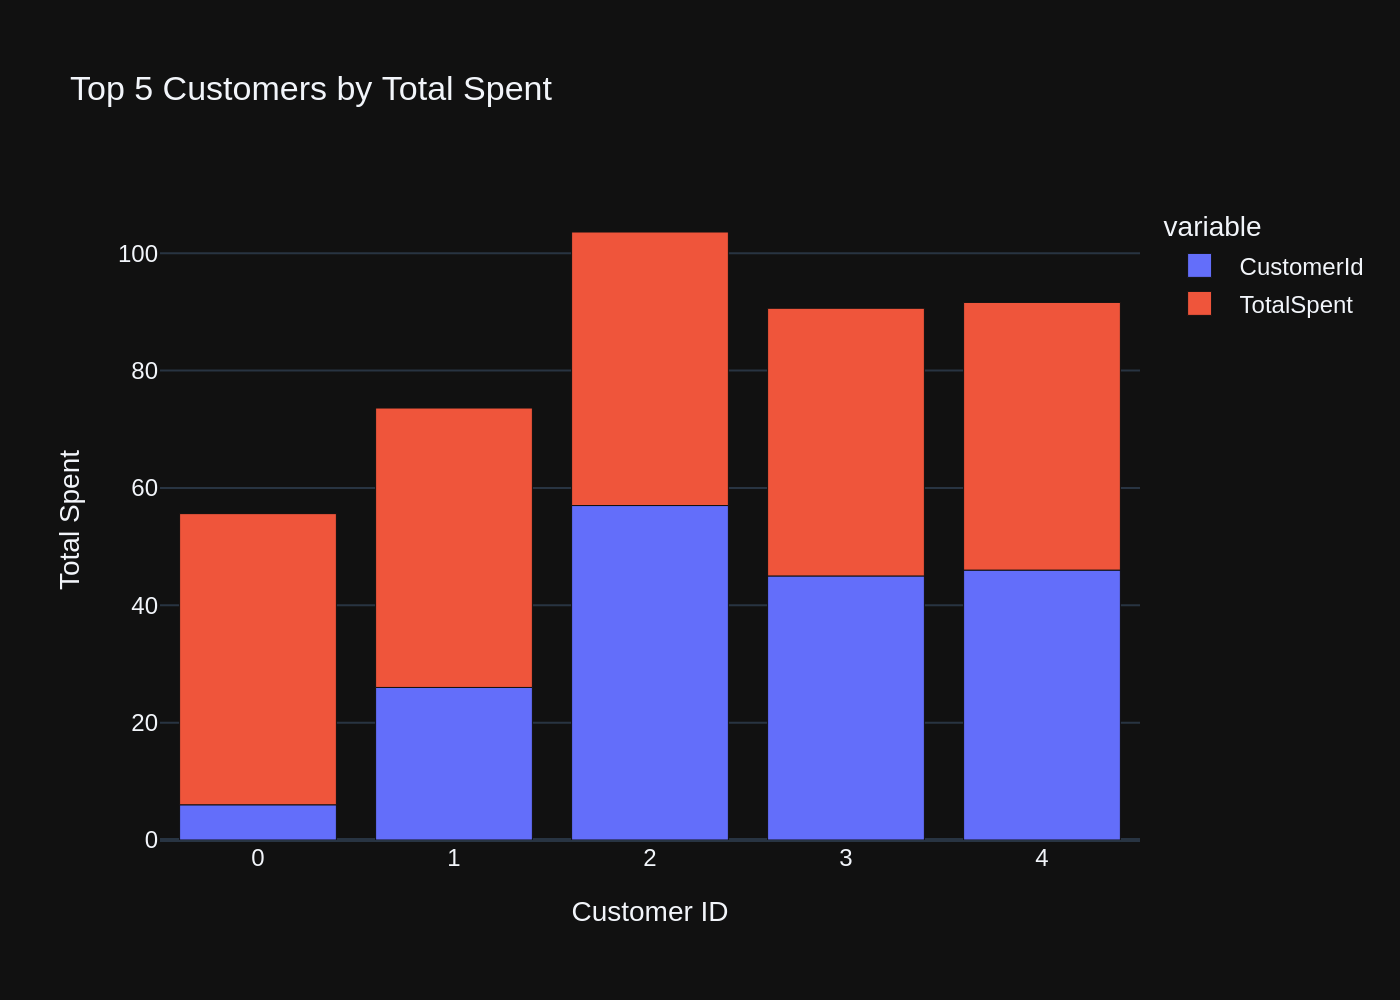

('SELECT CustomerId, SUM(Total) AS TotalSpent \nFROM Invoice \nGROUP BY CustomerId \nORDER BY TotalSpent DESC \nLIMIT 5',
    CustomerId  TotalSpent
 0           6       49.62
 1          26       47.62
 2          57       46.62
 3          45       45.62
 4          46       45.62,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'variable=CustomerId<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'CustomerId',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': 'CustomerId',
               'offsetgroup': 'CustomerId',
               'orientation': 'v',
               'showlegend': True,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([0, 1, 2, 3, 4]),
               'xaxis': 'x',
               'y': array([ 6., 26., 57., 45., 46.]),
               'yaxis': 'y'},
              {'alignmentgroup': 'True',
               'hovertemplate':

In [37]:
question = """  
     Find the top 5 customers who spent the most money overall, 
     
     Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON PlaylistTrack (TrackId)\n\nCREATE TABLE Playlist\n(\n    PlaylistId INTEGER  NOT NULL,\n    Name NVARCHAR(120),\n    CONSTRAINT PK_Playlist PRIMARY KEY  (PlaylistId)\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON 

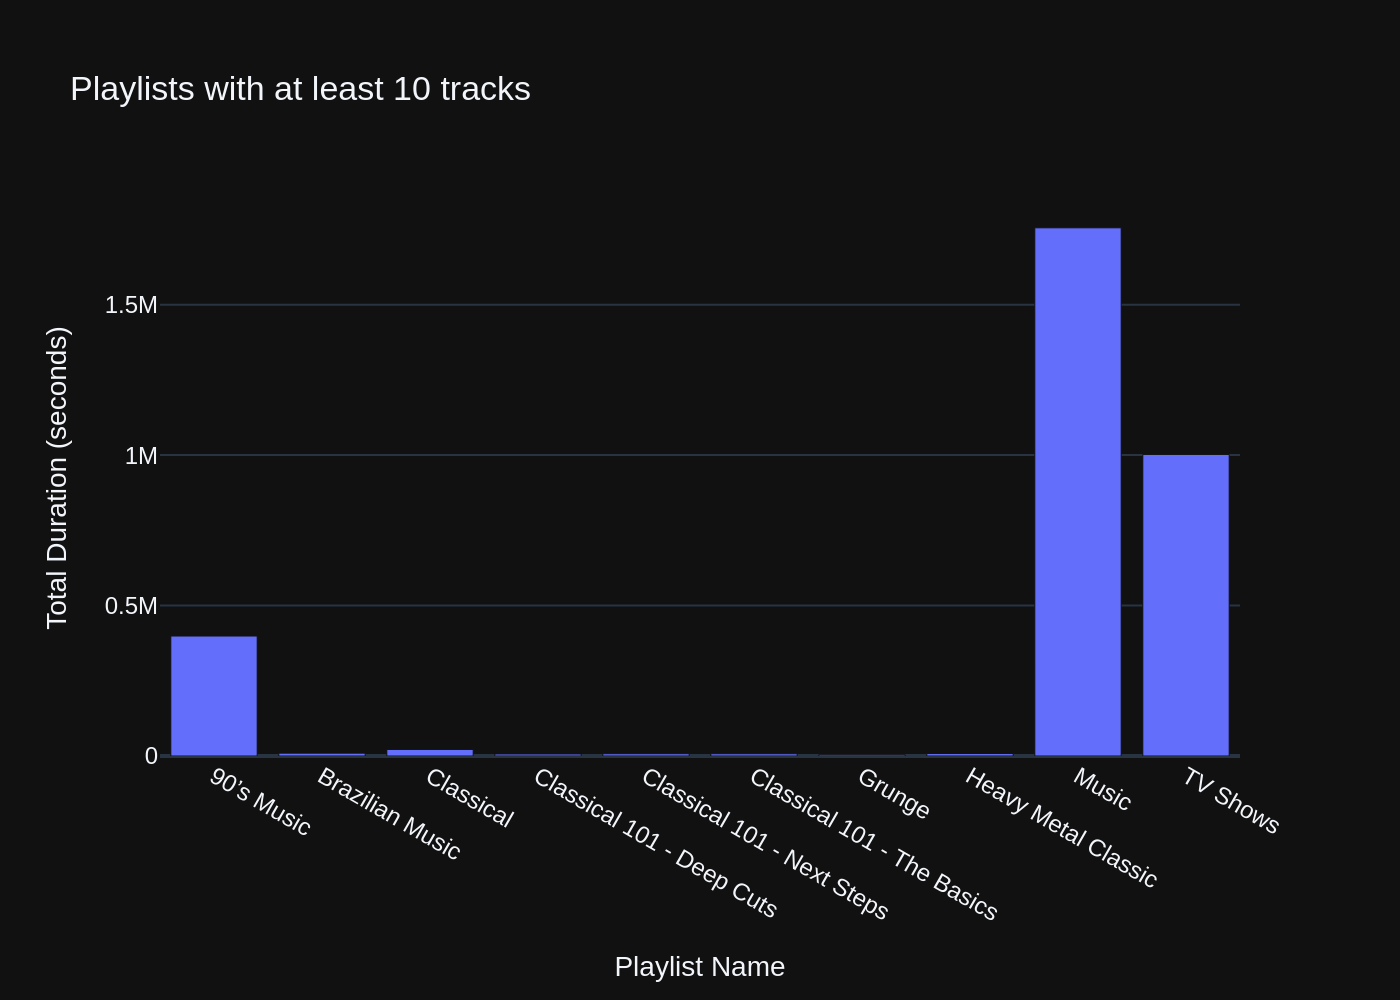

('SELECT P.Name, SUM(T.Milliseconds / 1000.0) AS TotalDuration \nFROM PlaylistTrack PT \nJOIN Track T ON PT.TrackId = T.TrackId \nJOIN Playlist P ON PT.PlaylistId = P.PlaylistId \nGROUP BY P.Name \nHAVING COUNT(DISTINCT T.TrackId) >= 10',
                          Name  TotalDuration
 0                  90’s Music     398705.153
 1             Brazilian Music       9486.559
 2                   Classical      21770.592
 3   Classical 101 - Deep Cuts       6755.730
 4  Classical 101 - Next Steps       7575.051
 5  Classical 101 - The Basics       7439.811
 6                      Grunge       4122.018
 7         Heavy Metal Classic       8206.312
 8                       Music    1755366.166
 9                    TV Shows    1002189.914,
 Figure({
     'data': [{'type': 'bar',
               'x': array(['90’s Music', 'Brazilian Music', 'Classical',
                           'Classical 101 - Deep Cuts', 'Classical 101 - Next Steps',
                           'Classical 101 - The Basics'

In [38]:
question = """  
     Get all playlists containing at least 10 tracks and the total duration of those tracks:
"""

vn.ask(question=question)

In [39]:
question = """  
     Identify artists who have albums with tracks appearing in multiple genres:


"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON Album (ArtistId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackG

### Check completion time

In [40]:
ts_stop = time()

elapsed_time = ts_stop - ts_start
print(f"test running on '{hostname}' with '{model_name}' LLM took : {elapsed_time:.2f} sec")

test running on 'papa-game' with 'llama3.2' LLM took : 1167.71 sec


In [41]:
from datetime import datetime
print(datetime.now())

2024-10-08 20:54:52.505762


## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
